In [116]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from clustering.KMeans import KMeans  
from clustering.KMedoids import KMedoids 
from sklearn import cluster, datasets, mixture
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids

# 1. Research about the Spectral Clustering method, and answer the following questions:

### a. In which cases might it be more useful to apply?

**Usefulness of Spectral Clustering:**
   - Spectral Clustering is often useful when dealing with data that has a complex structure, such as non-convex shapes or when the data is not well-separated in the input space.
   - It can effectively handle cases where traditional methods like K-Means may struggle, especially when the clusters have intricate shapes or vary in density.

### b. What are the mathematical fundamentals of it?

**Mathematical Fundamentals:**
   - Spectral Clustering is based on graph theory and linear algebra.
   - It involves creating an affinity matrix from the data points, which captures the pairwise similarity between points.
   - The Laplacian matrix of the graph is computed, and spectral techniques are applied to this matrix to obtain the final clusters.
   - The process is related to eigenvalue decomposition and eigenvectors.


### c. What is the algorithm to compute it?

**Algorithm to Compute Spectral Clustering:**
   - Given a dataset, the steps involved in Spectral Clustering include:
     1. Constructing an affinity matrix that represents pairwise similarities.
     2. Calculating the Laplacian matrix from the affinity matrix.
     3. Computing the eigenvectors and eigenvalues of the Laplacian matrix.
     4. Forming a lower-dimensional representation of the data using the eigenvectors.
     5. Applying traditional clustering algorithms (e.g., K-Means) on the lower-dimensional space.

### d. Does it hold any relation to some of the concepts previously mentioned in class? Which, and how?

**Relation to Concepts Previously Mentioned:**
   - Spectral Clustering is related to dimensionality reduction techniques like Principal Component Analysis (PCA) and Non-negative Matrix Factorization (NMF) as it involves working with eigenvectors.
   - It also relates to graph theory, where the construction of the affinity matrix and Laplacian matrix is akin to representing data points as nodes in a graph.

In summary, Spectral Clustering is a versatile method suitable for complex data structures, and its mathematical foundation lies in graph theory and linear algebra, making it effective in capturing intricate relationships within the data.

# 2. Research about the DBSCAN method, and answer the following questions:

### a. In which cases might it be more useful to apply?

- DBSCAN is particularly useful in cases where the clusters have varying shapes, sizes, and densities.
- It is robust to noise and outliers and does not require specifying the number of clusters in advance.
- Well-suited for datasets with irregularly shaped clusters or when the density of data points varies across the datase.


### b. What are the mathematical fundamentals of it?

- DBSCAN operates based on the density of data points, defining clusters as dense regions separated by sparser regions.
- It identifies core points with a specified number of neighbors within a defined radius and expands clusters by connecting neighboring core points.
- Key components include:
  - **Core Point:** A data point with at least a specified number of neighbors within a specified radius.
  - **Border Point:** A point within the radius of a core point but with fewer neighbors than required to be a core point.
  - **Noise:** Points that are neither core points nor border points.

### c. Is there any relation between DBSCAN and Spectral Clustering? If so, what is it?

- DBSCAN and Spectral Clustering are different clustering algorithms with distinct approaches.
- DBSCAN is density-based, relying on the density of points to form clusters, while Spectral Clustering uses graph-based techniques and eigenvectors.
- There is no direct conceptual or mathematical link between DBSCAN and Spectral Clustering.
- They are often chosen based on the nature of the data and the desired characteristics of the clusters.

In summary, DBSCAN is well-suited for datasets with varying densities and irregularly shaped clusters, operating based on the density of data points. While both DBSCAN and Spectral Clustering are clustering methods, they have different principles and are chosen based on the specific characteristics of the data at hand.

# 3. What is the elbow method in clustering? And which flaws does it pose to assess quality?

### Overview
The elbow method is a technique used to determine the optimal number of clusters (\(K\)) in a clustering algorithm. It involves running the clustering algorithm for a range of \(K\) values and plotting the cost or inertia against the number of clusters. The "elbow" in the plot corresponds to the point where the rate of decrease in cost starts to slow down, suggesting the optimal \(K\).

### Steps
1. Run the clustering algorithm for different \(K\) values.
2. Calculate the cost or inertia for each \(K\).
3. Plot the cost against the number of clusters.
4. Identify the "elbow" point where the rate of decrease in cost diminishes.

### Flaws and Considerations

1. **Subjectivity**
   - The choice of the "elbow" point is somewhat subjective and might vary between analysts.

2. **Dependence on Data**
   - The effectiveness of the elbow method depends on the structure of the data. In certain cases, the elbow might not be well-defined.

3. **Sensitivity to Noise**
   - The method can be sensitive to noise, outliers, or irregular cluster shapes, leading to misinterpretations.

4. **Non-Convex Clusters**
   - In cases where clusters have non-convex shapes or varying sizes, the elbow method may not accurately identify the optimal \(K\).

5. **Dependence on Distance Metric**
   - The choice of distance metric or clustering algorithm may impact the results, affecting the interpretation of the elbow.

6. **No Guarantee of Global Optimum**
   - The elbow method provides a local optimum but doesn't guarantee the global optimum, and the optimal \(K\) might be different for various aspects of the data.

7. **Use with Other Metrics**
   - It is often recommended to complement the elbow method with other clustering validation metrics for a more comprehensive assessment.

### Conclusion
While the elbow method is a widely used technique for estimating the number of clusters, it is crucial to interpret its results cautiously, considering the inherent subjectivity and limitations associated with different types of datasets and clustering algorithms. It is often beneficial to use multiple validation metrics to make a more informed decision about the optimal number of clusters.

# 4. Remember the unsupervised Python package you created in the previous unit? 😀It’s time for an upgrade.

### **In the CMD, within the 'unsupervised' repository, run:**
```python
python setup.py install


# 5. Let’s use the newly created modules in unsupervised to cluster some toy data.

### a. Use the following code snippet to create scattered data X

In [117]:
X, y = make_blobs(
n_samples=500,
n_features=2,
centers=4,
cluster_std=1,
center_box=(-10.0, 10.0),
shuffle=True,
random_state=1,
)

### b. Plot the resulting dataset. How many clusters are there? How far are they from one another?

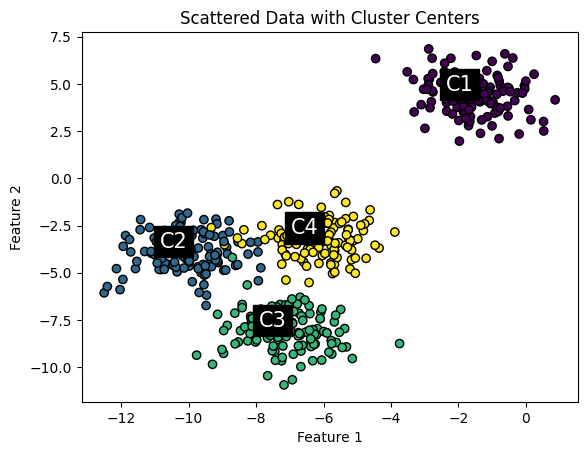

In [118]:
# Plot the resulting dataset with cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')

# Plot cluster centers and label them
centers = []
for i in range(4):  # Assuming 4 clusters
    cluster_points = X[y == i]
    cluster_center = np.mean(cluster_points, axis=0)
    centers.append(cluster_center)
    # plt.scatter(cluster_center[0], cluster_center[1], marker='X', s=200, c='red', edgecolors='black')
    plt.text(cluster_center[0], cluster_center[1], f'C{i + 1}', fontsize=15, ha='right', va='bottom',color='white',bbox=dict(facecolor='black', edgecolor='black'))

plt.title("Scattered Data with Cluster Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [119]:
#The distance between Cluster 1 and Cluster 4, to calculate the straight-line (Euclidean) distance between the centers of Cluster 1 and Cluster 4:
center_cluster1 = centers[0]
center_cluster4 = centers[3]

# Calculate the distance
distance = np.sqrt((center_cluster4[0] - center_cluster1[0])**2 + (center_cluster4[1] - center_cluster1[1])**2)

print(f"The distance between Cluster 1 and Cluster 4 is: {distance:.2f}")

The distance between Cluster 1 and Cluster 4 is: 8.89


Upon initial observation, four distinct clusters are clearly visible. Clusters C2, C3, and C4 are situated in the lower-left region, closely adjacent to each other. Meanwhile, Cluster C1 is positioned in the upper-right corner and is approximately 9 units away from the other three clusters. The latter three clusters are separated from each other by an approximate distance between three or five units, as show below:

In [120]:
# Assuming "centers" is the list of cluster centers
center_c2 = centers[1]
center_c3 = centers[2]
center_c4 = centers[3]

# Calculate the distance between C2 and C3
distance_c2_c3 = np.sqrt((center_c3[0] - center_c2[0])**2 + (center_c3[1] - center_c2[1])**2)

# Calculate the distance between C2 and C4
distance_c2_c4 = np.sqrt((center_c4[0] - center_c2[0])**2 + (center_c4[1] - center_c2[1])**2)

# Calculate the distance between C3 and C4
distance_c3_c4 = np.sqrt((center_c4[0] - center_c3[0])**2 + (center_c4[1] - center_c3[1])**2)

print(f"Distance between C2 and C3: {distance_c2_c3:.2f} units")
print(f"Distance between C2 and C4: {distance_c2_c4:.2f} units")
print(f"Distance between C3 and C4: {distance_c3_c4:.2f} units")


Distance between C2 and C3: 5.11 units
Distance between C2 and C4: 3.94 units
Distance between C3 and C4: 5.00 units


### c. For both k-means and k-medoids (your implementations), calculate the silhouette plots and coefficients for each run, iterating K from 1 to 5 clusters.

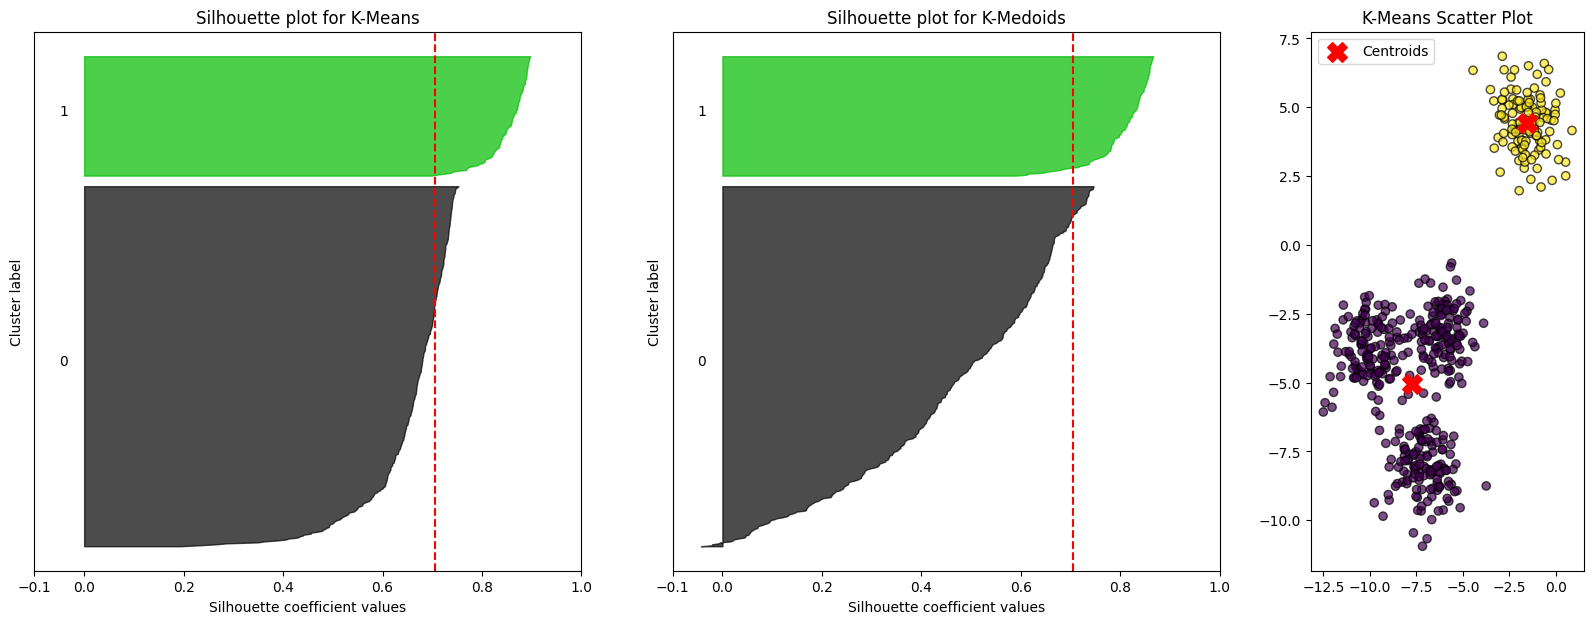

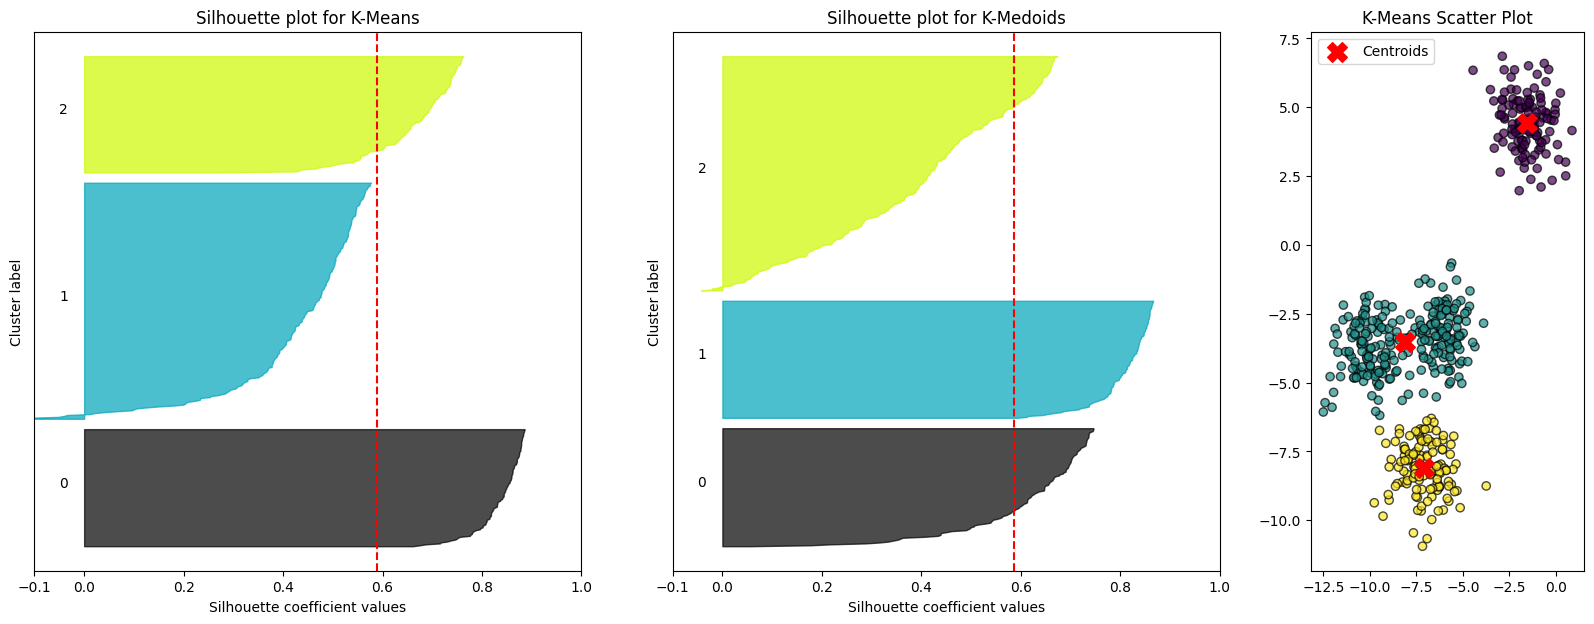

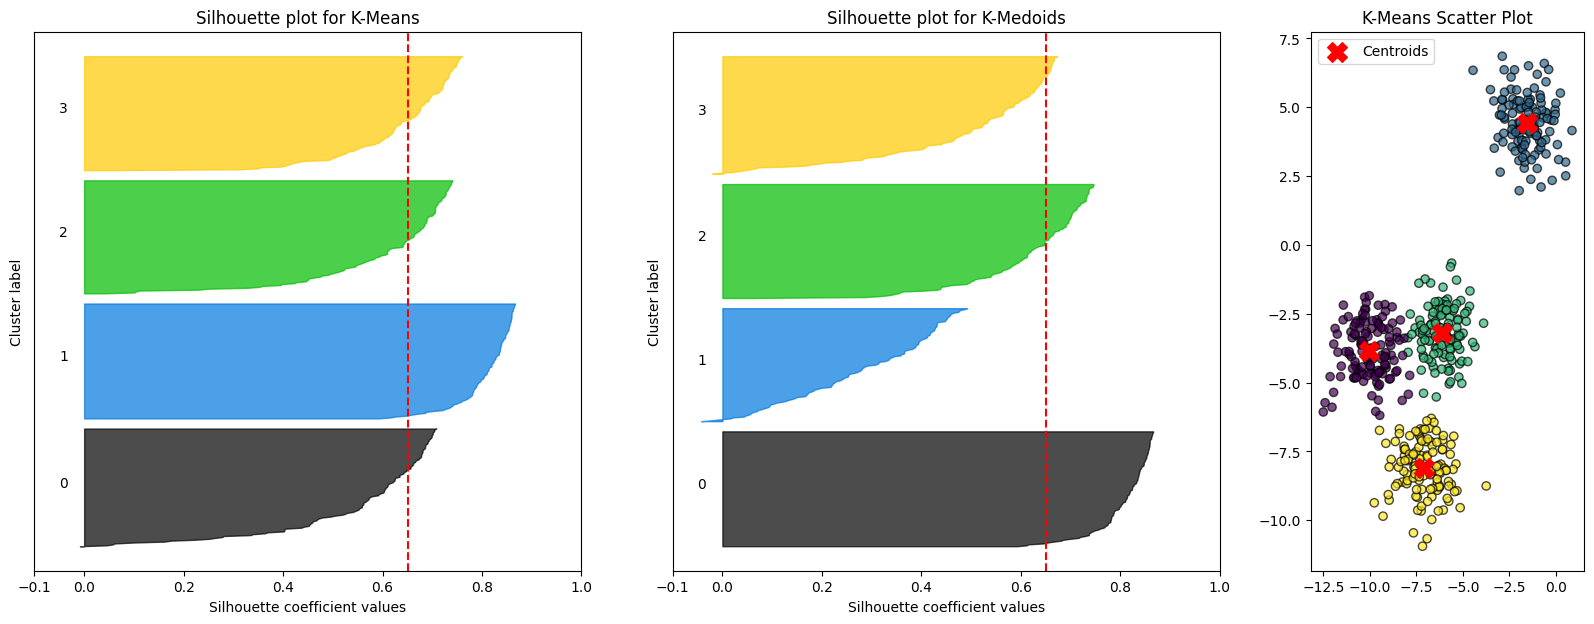

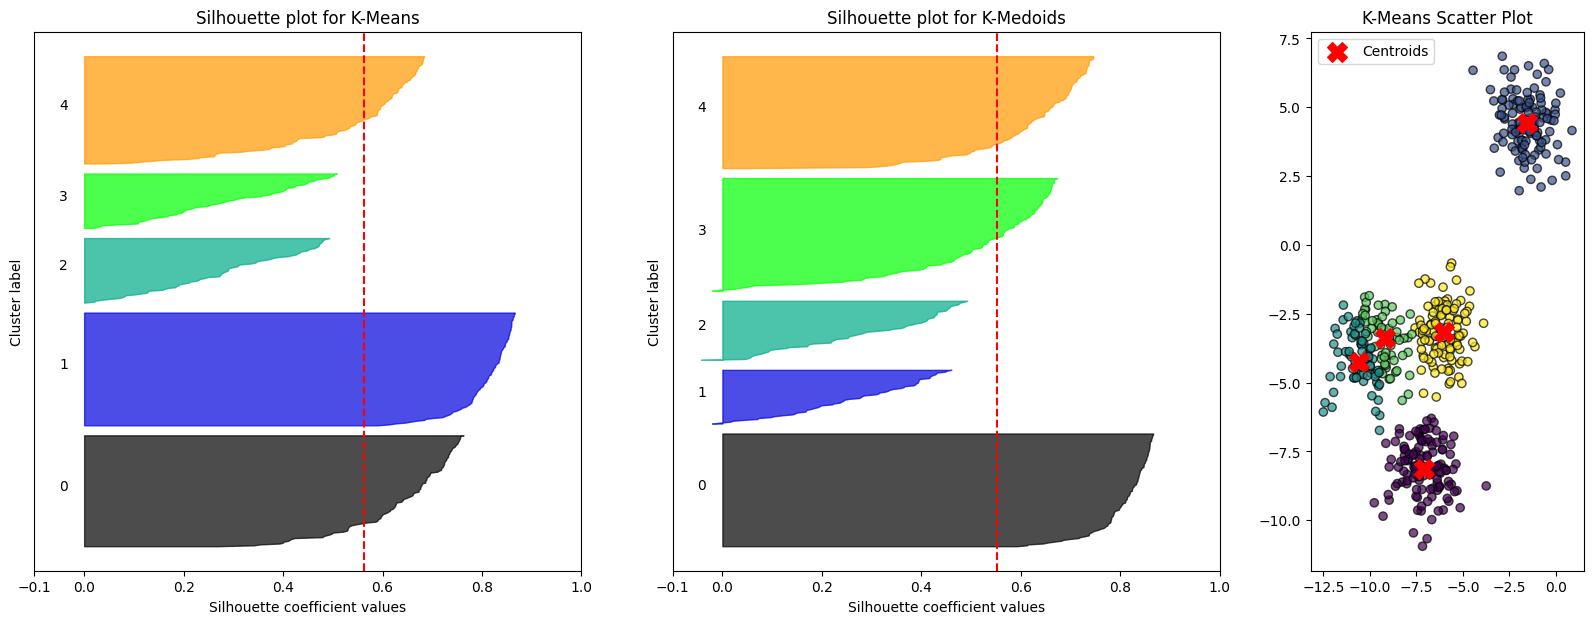

The best number of clusters (K) is: 2


In [142]:
best_silhouette_score = -1
best_k = None

# Initialize variables
best_silhouette_score = -1
best_k = None

# Iterate over different values of K
for k in range(2, 6):  # K from 2 to 5
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, gridspec_kw={'width_ratios': [1, 1, 0.5]})
    fig.set_size_inches(20, 7)

    # K-Means
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    kmeans_labels = kmeans.predict(X)

    # Silhouette plot for K-Means
    silhouette_avg_kmeans = silhouette_score(X, kmeans_labels)
    silhouette_values_kmeans = silhouette_samples(X, kmeans_labels)

    y_lower = 10
    for i in range(k):
        cluster_silhouette_values = silhouette_values_kmeans[kmeans_labels == i]
        cluster_silhouette_values.sort()
        size_cluster_i = cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette plot for K-Means")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg_kmeans, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    ax1.set_xlim([-0.1, 1])

    # K-Medoids
    kmedoids = KMedoids(n_clusters=k)
    kmedoids.fit(X)
    kmedoids_labels = kmedoids.predict(X)

    # Silhouette plot for K-Medoids
    silhouette_avg_kmedoids = silhouette_score(X, kmedoids_labels)
    # silhouette_values_kmedoids = silhouette_samples(X, kmedoids_labels)

    y_lower = 10
    for i in range(k):
        cluster_silhouette_values = silhouette_values_kmedoids[kmedoids_labels == i]
        cluster_silhouette_values.sort()
        size_cluster_i = cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / k)
        ax2.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        ax2.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax2.set_title("Silhouette plot for K-Medoids")
    ax2.set_xlabel("Silhouette coefficient values")
    ax2.set_ylabel("Cluster label")

    ax2.axvline(x=silhouette_avg_kmedoids, color="red", linestyle="--")
    ax2.set_yticks([])  # Clear the yaxis labels / ticks
    ax2.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    ax2.set_xlim([-0.1, 1])

     # Scatter plot with centers for K-Means
    ax3.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', edgecolors='k', alpha=0.7)
    ax3.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
    ax3.set_title("K-Means Scatter Plot")
    ax3.legend()

    # Update best K if current K has a higher silhouette score
    if silhouette_avg_kmeans > best_silhouette_score:
        best_silhouette_score = silhouette_avg_kmeans
        # print(best_silhouette_score)
        best_k = k

    plt.show()

# Print the result
print(f"The best number of clusters (K) is: {best_k}")


### d. What number of K got the best silhouette score? What can you say about the figures? Is this the expected result?

The silhouette score was highest for 2.

The silhouette plot indicates that values of 3, and 5 for n_clusters are not optimal choices due to the presence of clusters with silhouette scores below the average and significant fluctuations in silhouette plot sizes.

The analysis is more ambiguous when deciding between 2 and 4 for n_clusters.

The thickness of the silhouette plot visually represents the size of each cluster. Specifically, when n_clusters is equal to 2, the silhouette plot for group 0 is thicker, indicating a larger size, as it aggregates 3 subgroups into one large cluster. However, for n_clusters equal to 4, all plots have roughly similar thickness, suggesting comparable sizes, as also corroborated by the scatter plot labeled on the right.

In conclusion, while K=2 yields a better best_silhouette_score, I consider that K=4 corresponds to a more meaningful and balanced clustering solution. The silhouette score alone may not be the sole criterion for determining the optimal number of clusters, and a comprehensive evaluation of the clustering structure and interpretability is essential. In this case, K=4 seems to provide a more insightful grouping of the data.

# 6. Use the following code snippet to create different types of scattered data:

In [28]:
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropically distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
# blobs with varied variances
varied = datasets.make_blobs(
n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

### a. Plot the different datasets in separate figures. What can you say about them?

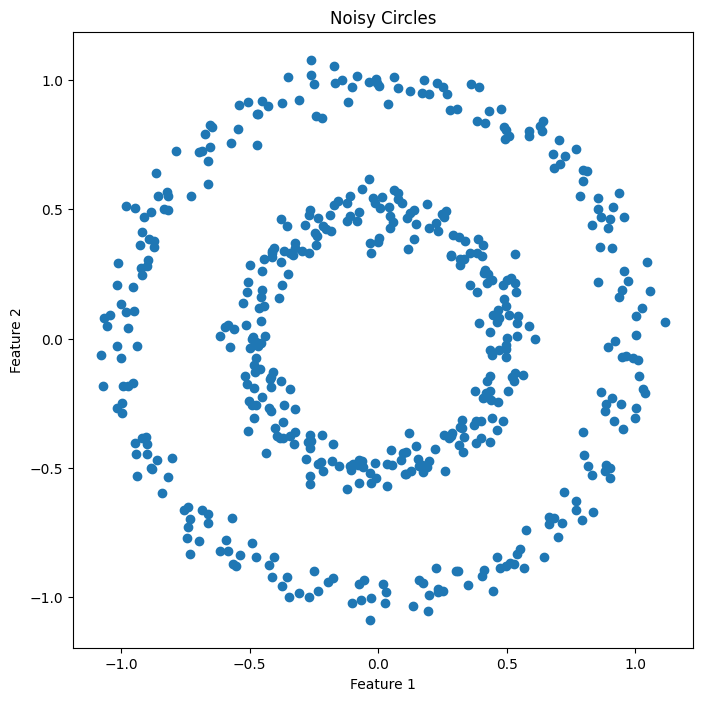

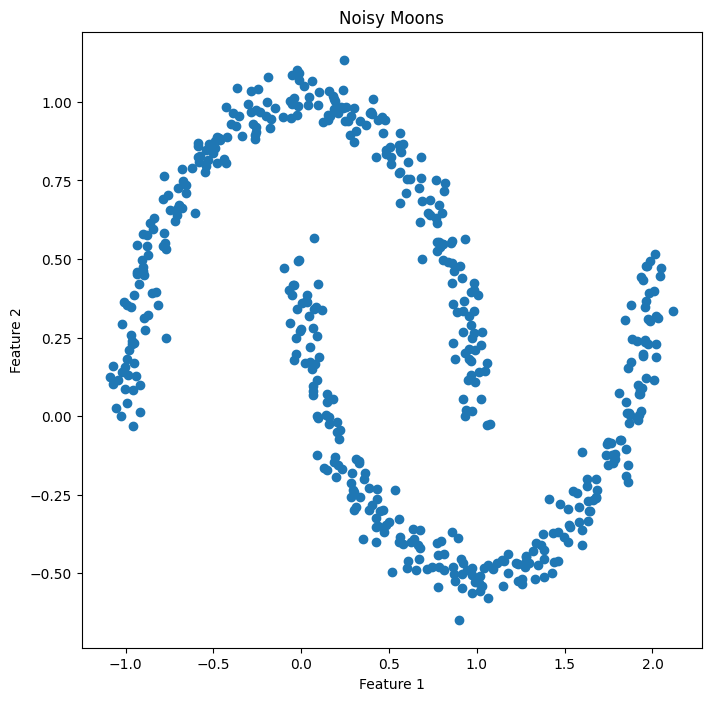

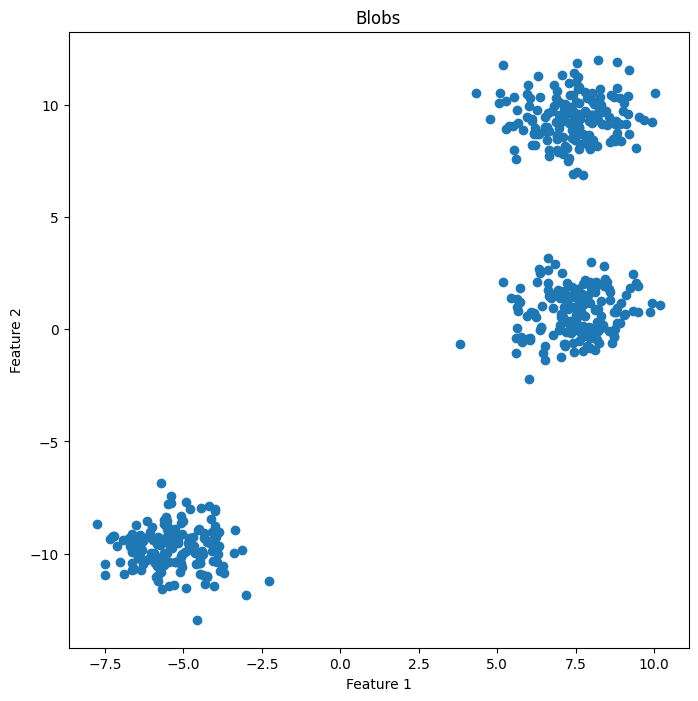

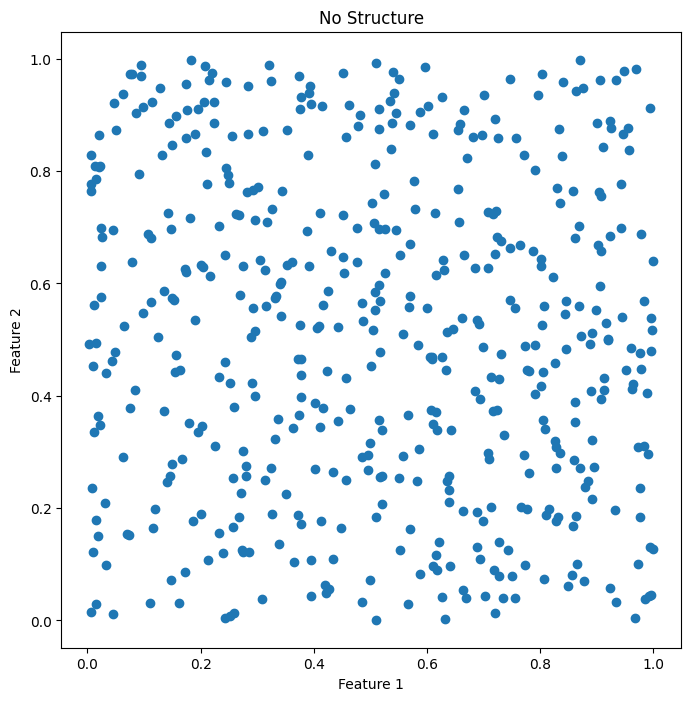

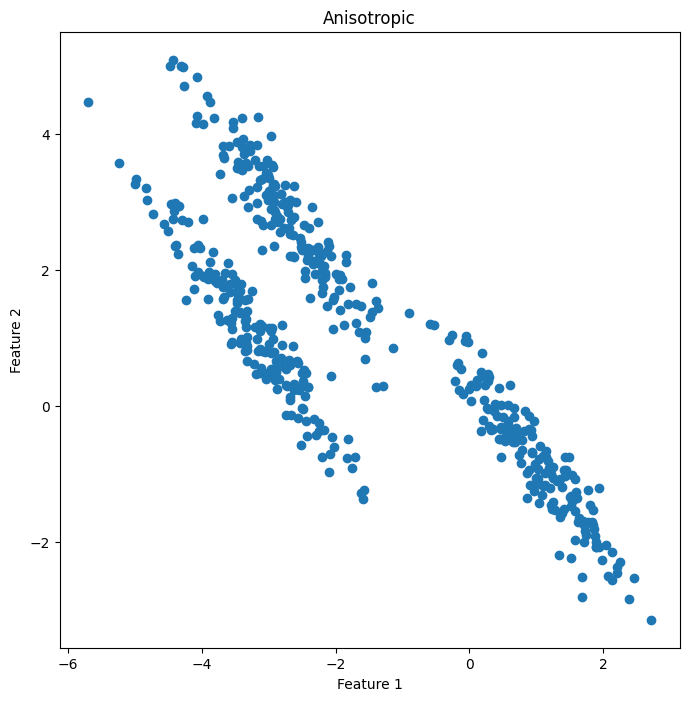

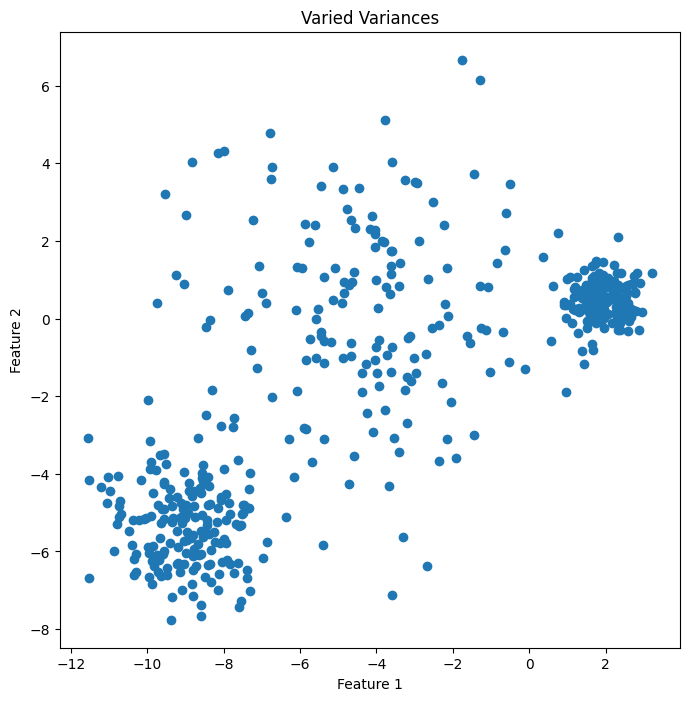

In [51]:
# Function to plot datasets
def plot_dataset(X, title):
    plt.figure(figsize=(8, 8))
    plt.scatter(X[:, 0], X[:, 1])
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot each dataset
plot_dataset(noisy_circles[0], title='Noisy Circles')
plot_dataset(noisy_moons[0], title='Noisy Moons')
plot_dataset(blobs[0], title='Blobs')
plot_dataset(no_structure[0], title='No Structure')
plot_dataset(aniso[0], title='Anisotropic')
plot_dataset(varied[0], title='Varied Variances')


### b. Apply k-means, k-medoids, DBSCAN and Spectral Clustering from Scikit-Learn over each dataset and compare the results of each algorithm with respect to each dataset.

C:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:285: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


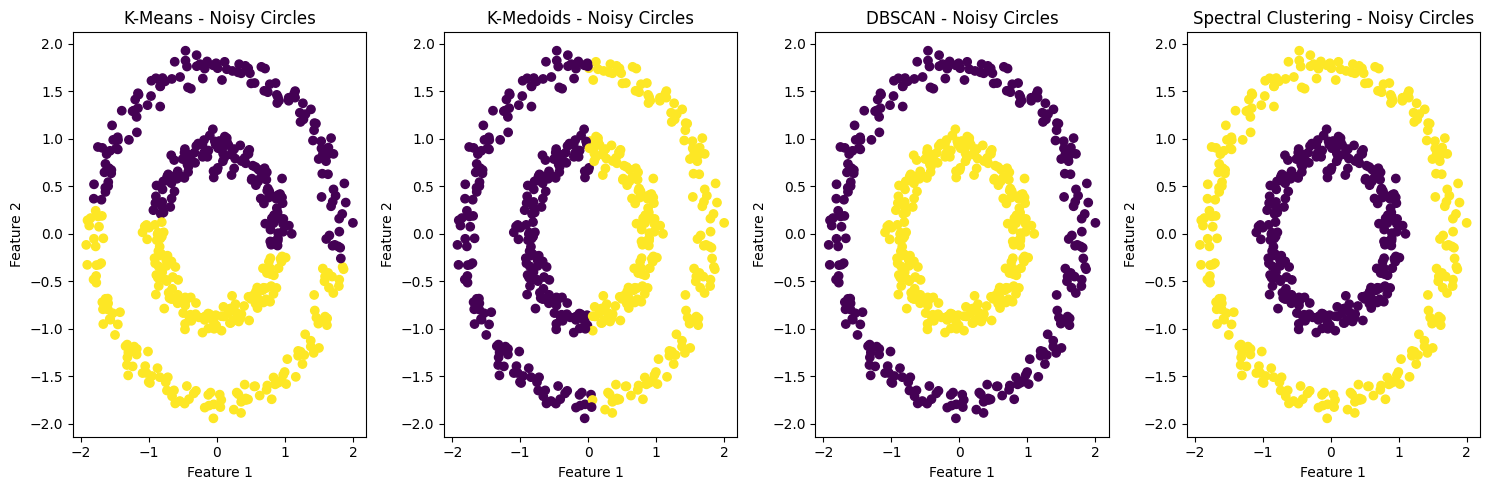

C:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:285: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


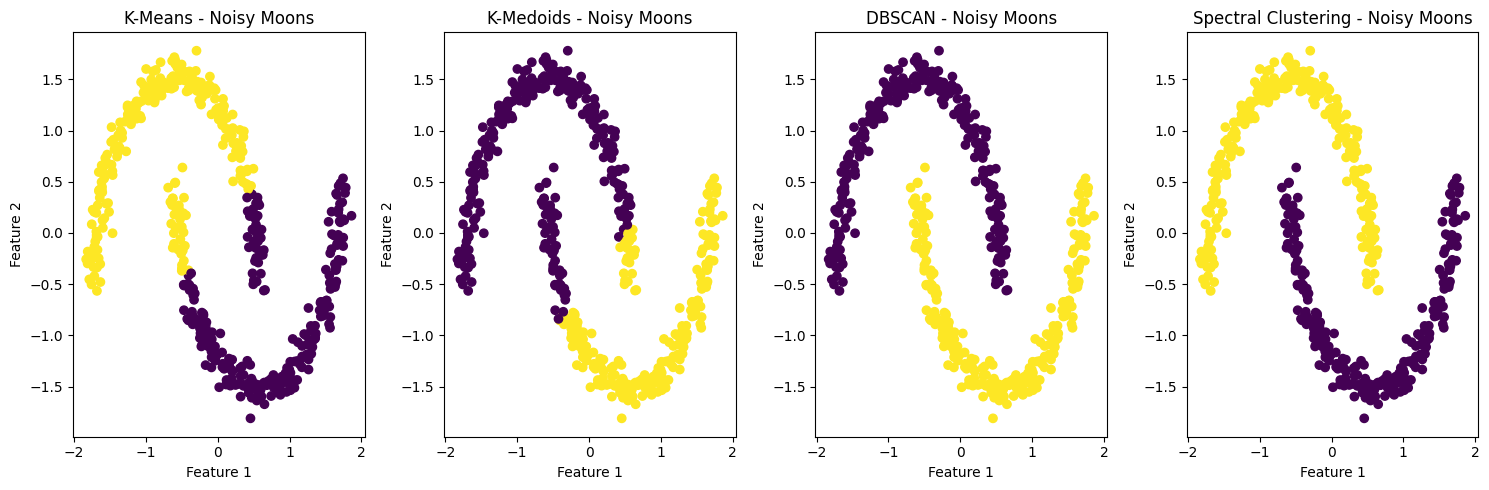

C:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:285: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


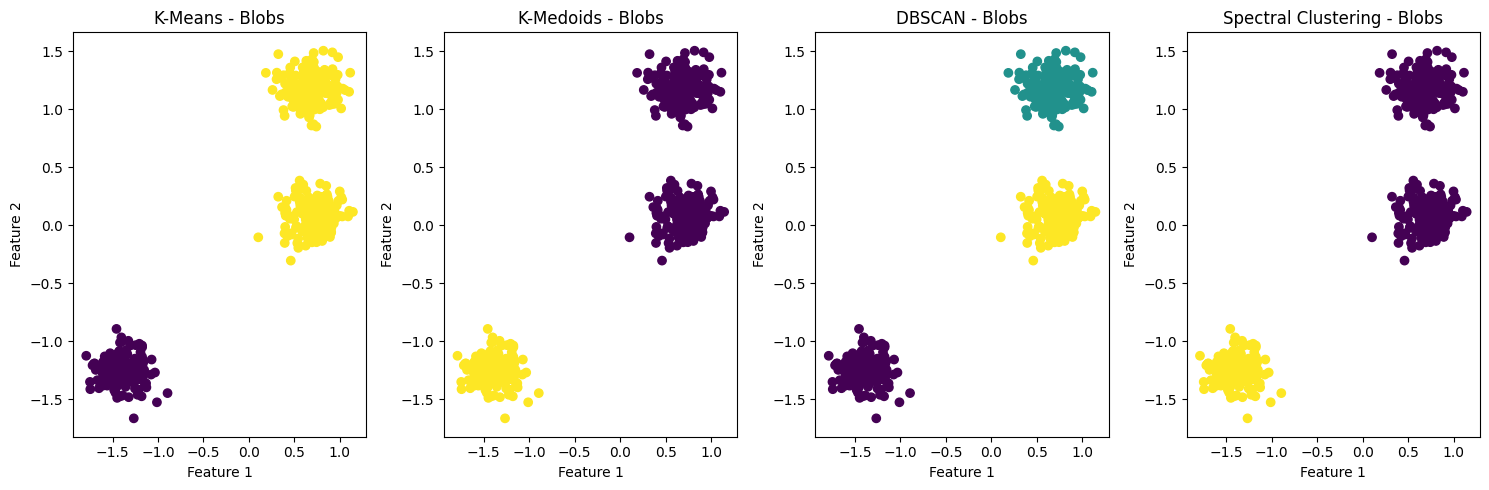

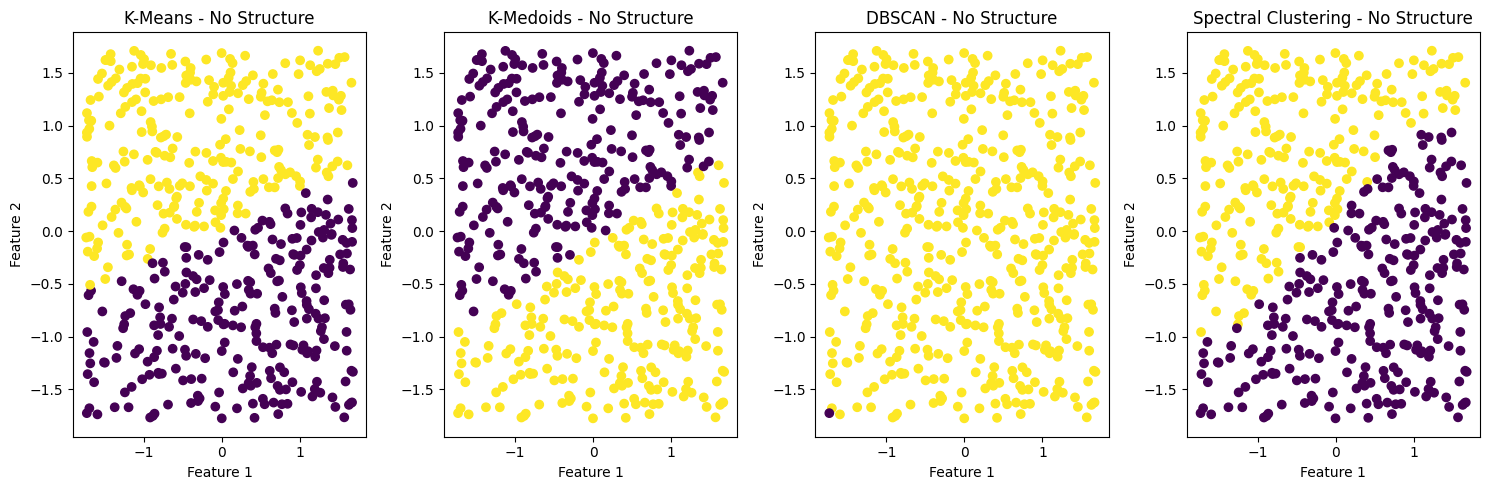

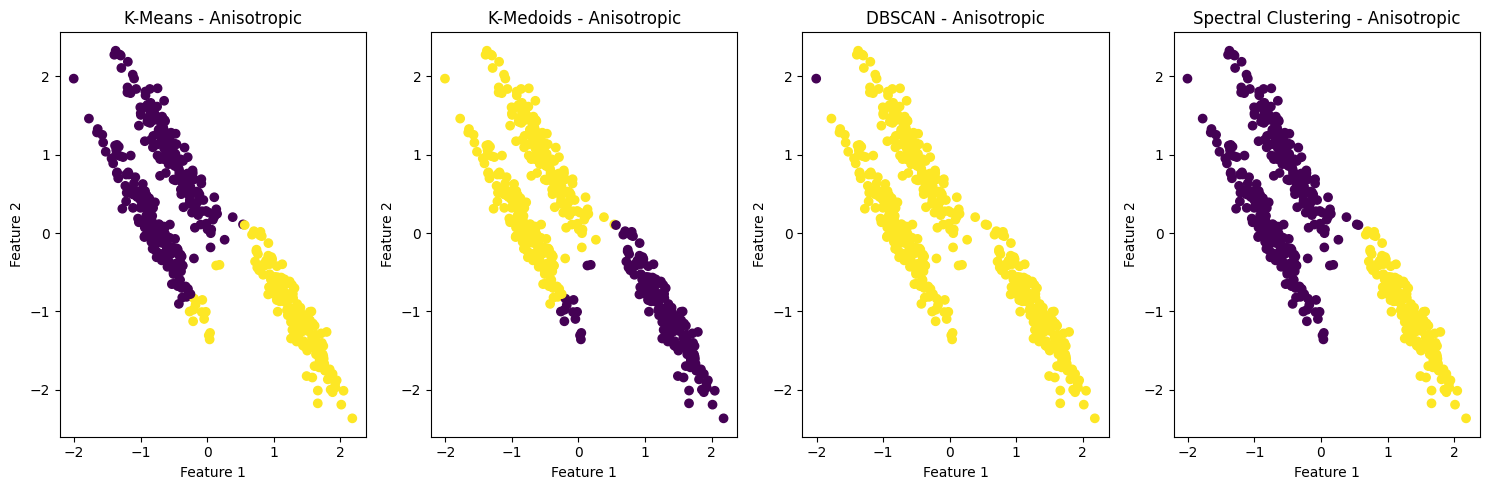

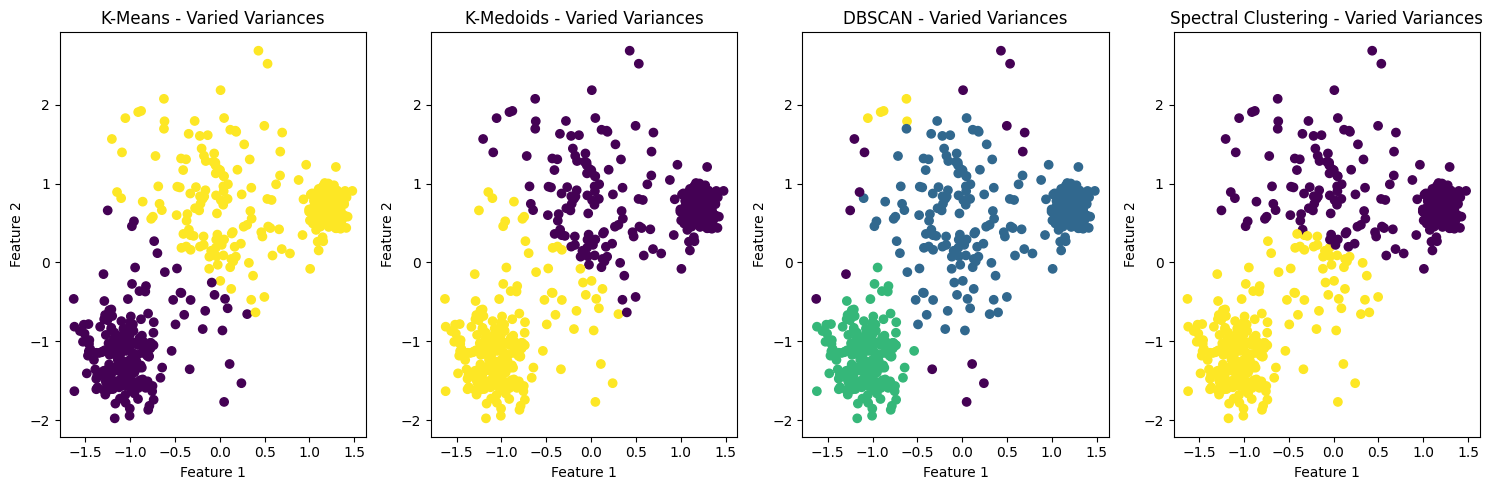

In [54]:
# Function to apply clustering algorithms and plot results
def apply_and_plot_clustering(X, algorithms, algorithm_names, dataset_name):
    plt.figure(figsize=(15, 5))
    
    for i, algorithm in enumerate(algorithms):
        # Apply clustering algorithm
        labels = algorithm.fit_predict(X)
        
        # Plot results
        plt.subplot(1, len(algorithms), i + 1)
        plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
        plt.title(f'{algorithm_names[i]} - {dataset_name}')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
    
    plt.tight_layout()
    plt.show()

# Apply and plot clustering for each dataset
datasets = [
    noisy_circles[0],
    noisy_moons[0],
    blobs[0],
    no_structure[0],
    aniso[0],
    varied[0]
]

dataset_names = [
    'Noisy Circles',
    'Noisy Moons',
    'Blobs',
    'No Structure',
    'Anisotropic',
    'Varied Variances'
]

# List of clustering algorithms
algorithms = [
    KMeans(n_clusters=2),
    KMedoids(n_clusters=2),
    DBSCAN(eps=0.3, min_samples=5),
    SpectralClustering(n_clusters=2, affinity='nearest_neighbors')
]

algorithm_names = [
    'K-Means',
    'K-Medoids',
    'DBSCAN',
    'Spectral Clustering'
]

# Apply and plot clustering for each dataset
for i in range(len(datasets)):
    X = StandardScaler().fit_transform(datasets[i])
    apply_and_plot_clustering(X, algorithms, algorithm_names, dataset_names[i])


**Conclusion:**

Upon analyzing the performance of various clustering algorithms across different datasets, several observations can be made:

1. **Cluster Separation and Shape:**
   - **DBSCAN and Spectral Clustering** demonstrate superior performance on datasets with irregular shapes, such as *Noisy Circles* and *Noisy Moons*. They effectively capture non-linear structures and distinct clusters.
   - For the *Blobs* dataset, most methods yield similar results, suggesting that these algorithms perform well on well-defined and separated clusters.

2. **Anisotropic Dataset:**
   - None of the methods used, including K-Means, K-Medoids, DBSCAN, and Spectral Clustering, successfully cluster the *Anisotropic* dataset, indicating challenges in handling anisotropic data structures.

3. **No Structure Dataset:**
   - Results on the *No Structure* dataset vary significantly among methods, and visually identifying clusters is challenging. This emphasizes the sensitivity of clustering algorithms to the inherent characteristics of4 performance.

5. **Scalability:**
   - The scalability of each method to different dataset sizes and complexities is crucial.
   - While specific scalability metrics are not provided in the analysis, it is recommended to assess how each algorithm handles larger datasets and high-dimensional data.

In summary, DBSCAN and Spectral Clustering stand out for capturing complex shapes, while the choice of method should be tailored to the dataset characteristics. The analysis underscores the need for a nuanced selection of clustering algorithms based on the specific nature of the data. Additionally, considering the efficiency and scalability aspects, further benchmarking and profiling may be warranted to identify the most suitable method for real-world, large-scale applications.